# Introduction

## Goal.
The goal of this lab is to perform some preliminary experiments aimed at understanding some advantages and pitfalls of Evolutionary Algorithms (EAs). In particular, you will observe the effects of mutations and problem dimensionality, and reflect to what extent these observations also apply to biological evolution.

Note that, unless otherwise specified, in this module's exercises we will use real-valued genotypes. 
I.e., an individual is a vector of real-valued parameters $\mathbf{x} = \{x_1, x_2, \dots, x_N\}$ (however, keep in mind that other types of individual representations are possible, such as trees or bit strings, which will not be explored in this lab). The fitness of an individual is given by the fitness function $f(\mathbf{x})$. The aim of the algorithms will be to *minimize* the fitness function $f(\mathbf{x})$, i.e. to find the vector $\mathbf{x}_{min}$ that has the lowest value $f(\mathbf{x})$. In other words, lower values $f(\mathbf{x})$ correspond to a better fitness!

In [1]:
!pip install inspyred
!pip install deap


[notice] A new release of pip is available: 23.0 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.0 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip




# Exercise 1
In this first exercise, we will not yet run a complete EA. Instead, we consider a single parent individual **$x_{0}$**, from which a number of offspring individuals are created using a Gaussian mutation operator (which adds a random number from a Gaussian distribution with mean zero and standard deviation $\sigma$ to each parameter $x_i$ of the parent). The fitness function, shown in the figure below for $N=2$ variables, is defined as:

<br>
$f(\mathbf{x}) = \sum_{i=1}^{N}{x^2_i}$
<br>

![sphere.png](img/img_01/sphere.png)

This function is usually defined to as *sphere* function$^{[1]}$ and is one of the most used benchmark functions in continuous (real-valued) optimization. This fitness function is unimodal, i.e. it has a single global minimum at the origin. Furthermore, this function is *scalable*, i.e. it can be defined for any arbitrary number of variables ($N=1, 2, 3, ...$, i.e. $N \in \mathbb{N}$).
We will analyze the effects of mutations on the fitness depending on the value of the parent $\mathbf{x}_0$, the mutation magnitude$^{[2]}$ (the standard deviation $\sigma$), and the number of dimensions $N$ of the search space.

To start the experiments, run the next cell$^{[3]}$. It willl generate offspring from a single parent $\mathbf{x}_0$ using a Gaussian mutation operator (which adds a random number from a Gaussian distribution with mean zero and standard deviation $\sigma$ to the parent). Generate offspring from different parents (e.g. $\mathbf{x}_0$=0.1, 1, 10) using different mutation magnitudes (standard deviations $\sigma$). First consider the one-dimensional case, then two dimensions, and finally many dimensions (e.g. $N =100$). For one or two dimensions, the fitness landscape with the parent and the offspring is shown. For more dimensions, a __[boxplot](http://matplotlib.org/api/pyplot_api.html\#matplotlib.pyplot.boxplot)__ if you are unfamiliar with boxplots with the fitness of the offspring is shown where the green, dashed line is the fitness of the parent.

Try to answer the following questions:

- **Do the mutations tend to improve or worsen the fitness of the parent?** <br>
Mutations play a crucial role in the journey towards the global minimum, especially when the starting point is far away. In such cases, increasing the standard deviation is beneficial as it allows individuals to explore a wider range of possibilities and gradually approach the desired outcome. However, it's important to note that mutations alone do not directly contribute to improving the overall fitness of individuals. While some may find themselves closer to the global minimum, others may remain relatively distant.
- **Are low or high mutation magnitudes best for improving the fitness? How does this depend on the initial value of the parent and on the number of dimensions of the search space?** <br>
As mentioned before, the farther the starting point is from the global optimum, the more necessary it becomes to increase the mutation rate in order to reach it. Thus, when dealing with a distant starting point, higher mutation values are preferred. However, it's important to note that this does not guarantee convergence of all generated individuals, as some may end up diametrically opposite due to the symmetry of the Gaussian distribution.


---

[1]: 
Note that its contour lines, i.e. the loci of points for which the function has a constant value, are $N$-dimensional *spheres* centered in **0**. For instance, in 2-D, the contour lines are curves described by $x^2_1+x^2_2=k$, which correspond to a circle (the equivalent of a sphere in 2 dimension) with radius $\sqrt{k}$ and center in $\{0,0\}$. In 3-D, the contour lines are curves described by $x^2_1+x^2_2+x^2_3=k$, which correspond to a sphere with radius $\sqrt{k}$ and center in $\{0,0,0\}$. For $N>3$, each contour line corresponds to a *hyper-sphere*, i.e. a generalization of a sphere.

[2]: 
In the following, *mutation magnitude* indicates a generic measure of the mutation effect on the genotype. E.g. in continuous optimization with Gaussian mutation $x'=x+\mathcal{N}(0, \sigma$) the *mutation magnitude* is simply $\sigma$. This is different from the *mutation probability*, that is the chance that a given loci would be mutated. The combination of these two aspects, magnitude and probability, may be considered the overall *mutation rate*.] 

[3]: 
For all the exercises in this lab you may set the seed for the pseudo-random number generator. This will allow you to reproduce your results. 


In [3]:
plt.style.use('ggplot')

STANDARD DEVIATION = 0.1


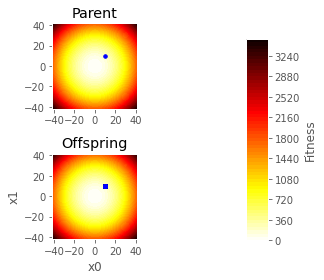

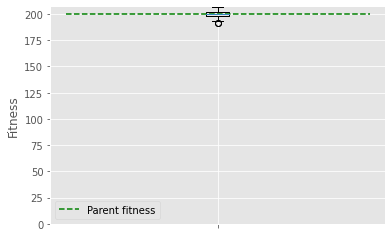

STANDARD DEVIATION = 0.5


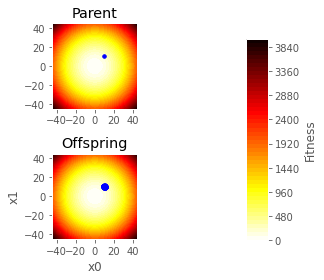

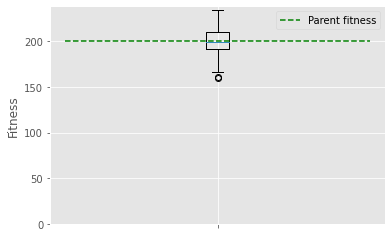

STANDARD DEVIATION = 1


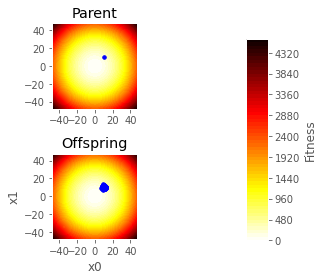

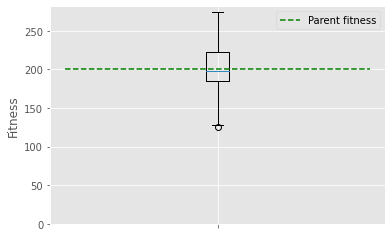

STANDARD DEVIATION = 2


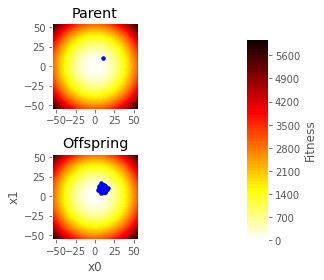

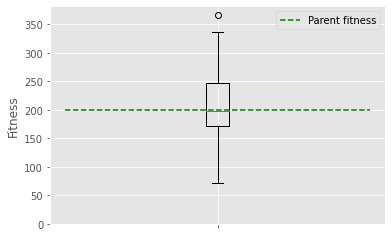

STANDARD DEVIATION = 5


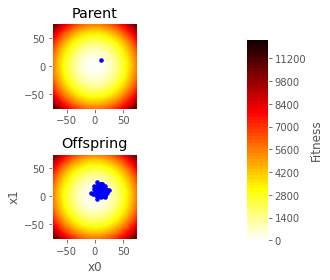

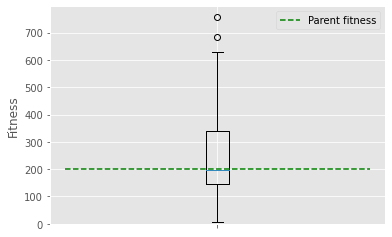

STANDARD DEVIATION = 10


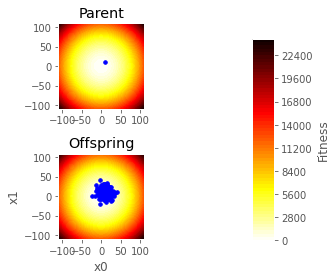

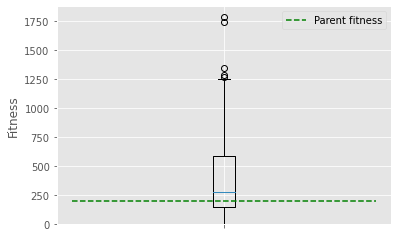

In [44]:
from pylab import *
from utils.utils_01.ga import generate_offspring
from random import Random
import sys

"""
-------------------------------------------------------------------------
Edit this part to do the exercises

Choose the parent x0 that will be mutated. It can have an arbitrary 
number of dimensions, but plotting of the fitness landscape is only 
possible for the 1D or 2D case.
"""

#x0 = [10] # 1 parameter
x0 = [10,10]; # 2 parameters
#x0 = 10*ones(50); # 50 parameters

# Set the standard deviation of the Gaussian mutations
std_dev = [0.1, 0.5, 1, 2, 5, 10]

# Set number of offspring to be generated
num_offspring = 250 #The number of childs

"""
-------------------------------------------------------------------------
"""

parent_fit = []
offspring_fit = []
off = []

for i in std_dev:
    print("STANDARD DEVIATION = {}".format(i))
    args = {}
    args["fig_title"] = 'Random sampling'

    seed = 238842
    rng = Random(seed)
    plot_fitness_landscape = True # Set to False to disable the plots

    parent_fitness, offspring_fitnesses, offspring = generate_offspring(rng, x0, i,
                                                    num_offspring, 
                                                    plot_fitness_landscape,
                                                    args)
    
    parent_fit.append(parent_fitness)
    offspring_fit.append(offspring_fitnesses)
    off.append(offspring)
    
    
    
    
    """
    Boxplot of the offspring fitnesses. The fitness of the parent is plotted as
    a dashed, green line.
    """

    fig = figure('Offspring fitness')
    ax = fig.gca()

    ax.boxplot(offspring_fitnesses)

    ax.set_xticklabels([])
    ax.plot([0,2], [parent_fitness, parent_fitness], 'g--', label='Parent fitness');
    ax.set_ylabel('Fitness')
    ax.set_ylim(ymin=0)
    ax.legend()
    show()
    

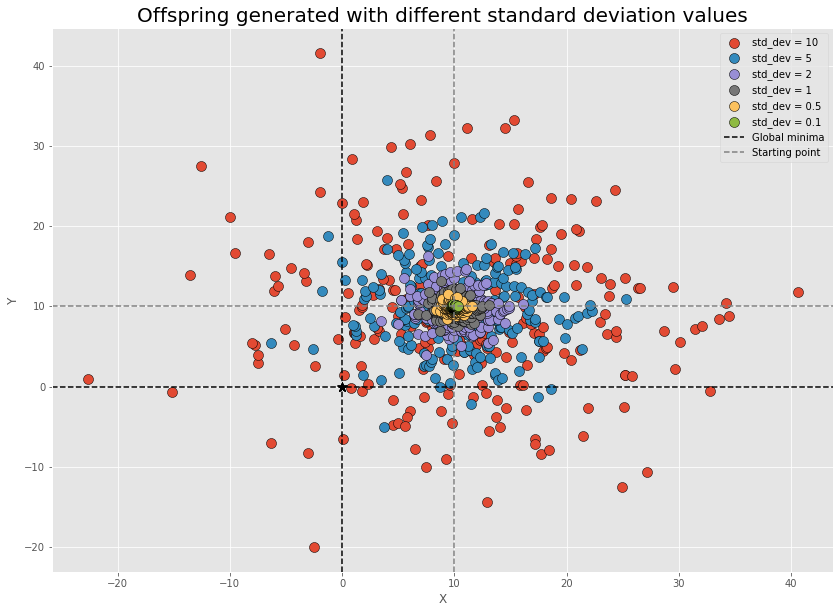

In [59]:
fig, ax = plt.subplots(figsize = (14, 10))

for i in range(len(std_dev)):
    coordinates = off[len(std_dev)-1-i] 
    x = [point[0] for point in coordinates]
    y = [point[1] for point in coordinates]  

    ax.scatter(x, y, s = 100,  edgecolor = "black", label="std_dev = {}".format(std_dev[len(std_dev)-1-i]))
    ax.scatter(0,0, s=100, color="black", marker='*')

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.axhline(y=0, color='black', linestyle='--', label = "Global minima")
ax.axhline(y=10, color='grey', linestyle='--')
ax.axvline(x=0, color='black', linestyle='--')
ax.axvline(x=10, color='grey', linestyle='--',label = "Starting point")

ax.set_title("Offspring generated with different standard deviation values", fontsize=20)
ax.legend()

plt.show()

# Exercise 2

In this exercise we will try to confirm the observations that we did qualitatively in the previous exercise, by plotting boxplots side-by-side to evaluate the statistical significance of observed differences.

Run the next cell, and compare different values for:

- the number of dimensions of the search space;
- the value of the parent (how close it is to the optimum);
- the mutation magnitude $\sigma$;

and try to confirm the answers that you gave in the previous exercise. See the comments in the script for more details.

**NOTE**: If you vary one of these three parameters, *make sure that you set the other two at a constant value* (otherwise it may be difficult to interpret your results).

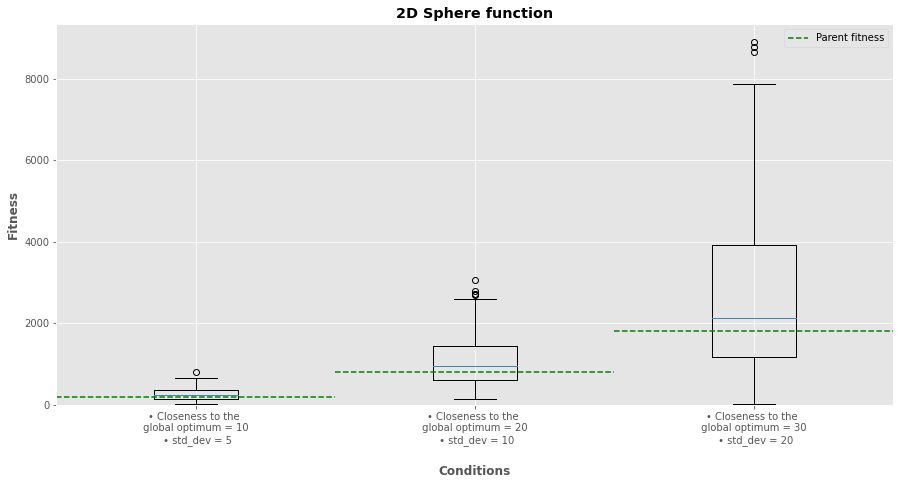

In [22]:
from utils.utils_01.ga import generate_offspring
from pylab import *
from random import Random
import sys

""" 
-------------------------------------------------------------------------
Edit this part to do the exercises

Try different values for either:
    (1) the number of dimensions of the search space
    (2) how close the parent is to the global optimum
    (3) the mutation rate
 If you vary one of the three things, you may want to keep the other two
 at a constant value to better understand the effects (as shown in the
 example below).
"""

# (1) Vary the number of dimensions of the search space
num_vars_1 = 2;
num_vars_2 = 2;
num_vars_3 = 2;

# (2) Vary how close the parent is to the optimum
value_1 = 10;
value_2 = 20;
value_3 = 30;

# The parents are created for the three conditions
x0_1 = value_1*ones(num_vars_1);
x0_2 = value_2*ones(num_vars_2);
x0_3 = value_3*ones(num_vars_3);

# (3) Vary the standard deviation of the Gaussian mutations
std_dev_1 = 5;
std_dev_2 = 10;
std_dev_3 = 20;

# Number of offspring to be generated
num_offspring = 200;

"""
-------------------------------------------------------------------------
"""

args = {}
seed = None
rng = Random(seed)
# Generate offspring for the three conditions
args["fig_title"] = 'Random sampling (condition 1)'
parent_fitness_1, offspring_fitness_1, _ = generate_offspring(rng, x0_1, 
                                                           std_dev_1, 
                                                           num_offspring, 
                                                           False, args);
args["fig_title"] = 'Random sampling (condition 2)'
parent_fitness_2, offspring_fitness_2, _ = generate_offspring(rng, x0_2, 
                                                           std_dev_2, 
                                                           num_offspring, 
                                                           False, args);
args["fig_title"] = 'Random sampling (condition 3)'
parent_fitness_3, offspring_fitness_3, _ = generate_offspring(rng, x0_3,
                                                           std_dev_3, 
                                                           num_offspring, 
                                                           False, args);

"""
Boxplot of the offspring fitnesses. The fitness of the parent is plotted as
a dashed, green line.
"""
fig = figure('Offspring fitness', figsize = (15,7))
ax = fig.gca()
ax.boxplot([offspring_fitness_1, offspring_fitness_2, offspring_fitness_3],
           notch=False)
ax.plot([0.5, 1.5], [parent_fitness_1, parent_fitness_1], 'g--', label='Parent fitness');
ax.plot([1.5, 2.5], [parent_fitness_2, parent_fitness_2], 'g--');
ax.plot([2.5, 3.5], [parent_fitness_3, parent_fitness_3], 'g--');
ax.set_xticklabels(['• Closeness to the \n global optimum = 10 \n • std_dev = 5', '• Closeness to the \n global optimum = 20 \n • std_dev = 10', '• Closeness to the \n global optimum = 30 \n • std_dev = 20'])
ax.set_xlabel(' \nConditions', fontweight =  "bold")
ax.set_ylabel('Fitness', fontweight = "bold")
ax.set_title("2D Sphere function", fontweight = "bold")
ax.set_ylim(ymin=0)
ax.legend()
show()

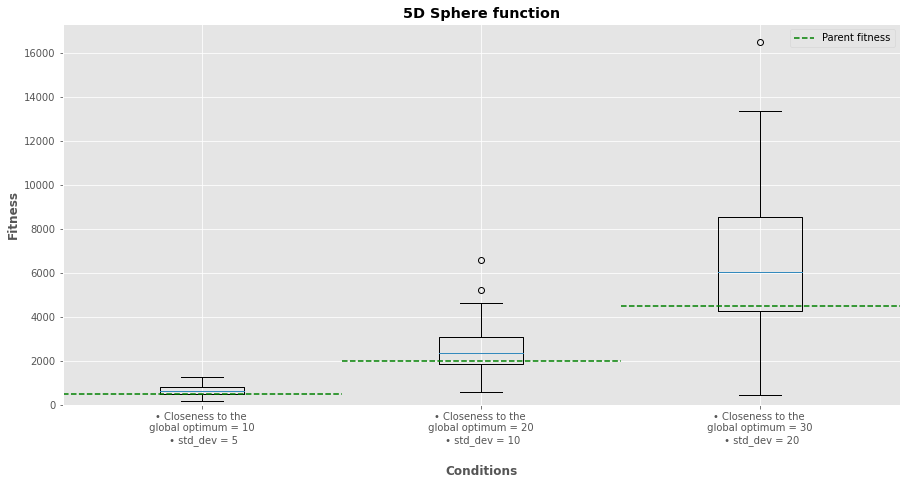

In [23]:
from utils.utils_01.ga import generate_offspring
from pylab import *
from random import Random
import sys

""" 
-------------------------------------------------------------------------
Edit this part to do the exercises

Try different values for either:
    (1) the number of dimensions of the search space
    (2) how close the parent is to the global optimum
    (3) the mutation rate
 If you vary one of the three things, you may want to keep the other two
 at a constant value to better understand the effects (as shown in the
 example below).
"""

# (1) Vary the number of dimensions of the search space
num_vars_1 = 5;
num_vars_2 = 5;
num_vars_3 = 5;

# (2) Vary how close the parent is to the optimum
value_1 = 10;
value_2 = 20;
value_3 = 30;

# The parents are created for the three conditions
x0_1 = value_1*ones(num_vars_1);
x0_2 = value_2*ones(num_vars_2);
x0_3 = value_3*ones(num_vars_3);

# (3) Vary the standard deviation of the Gaussian mutations
std_dev_1 = 5;
std_dev_2 = 10;
std_dev_3 = 20;

# Number of offspring to be generated
num_offspring = 200;

"""
-------------------------------------------------------------------------
"""

args = {}
seed = None
rng = Random(seed)
# Generate offspring for the three conditions
args["fig_title"] = 'Random sampling (condition 1)'
parent_fitness_1, offspring_fitness_1, _ = generate_offspring(rng, x0_1, 
                                                           std_dev_1, 
                                                           num_offspring, 
                                                           False, args);
args["fig_title"] = 'Random sampling (condition 2)'
parent_fitness_2, offspring_fitness_2, _ = generate_offspring(rng, x0_2, 
                                                           std_dev_2, 
                                                           num_offspring, 
                                                           False, args);
args["fig_title"] = 'Random sampling (condition 3)'
parent_fitness_3, offspring_fitness_3, _ = generate_offspring(rng, x0_3,
                                                           std_dev_3, 
                                                           num_offspring, 
                                                           False, args);

"""
Boxplot of the offspring fitnesses. The fitness of the parent is plotted as
a dashed, green line.
"""
fig = figure('Offspring fitness', figsize = (15,7))
ax = fig.gca()
ax.boxplot([offspring_fitness_1, offspring_fitness_2, offspring_fitness_3],
           notch=False)
ax.plot([0.5, 1.5], [parent_fitness_1, parent_fitness_1], 'g--', label='Parent fitness');
ax.plot([1.5, 2.5], [parent_fitness_2, parent_fitness_2], 'g--');
ax.plot([2.5, 3.5], [parent_fitness_3, parent_fitness_3], 'g--');
ax.set_xticklabels(['• Closeness to the \n global optimum = 10 \n • std_dev = 5', '• Closeness to the \n global optimum = 20 \n • std_dev = 10', '• Closeness to the \n global optimum = 30 \n • std_dev = 20'])
ax.set_xlabel(' \nConditions', fontweight =  "bold")
ax.set_ylabel('Fitness', fontweight = "bold")
ax.set_title("5D Sphere function", fontweight ="bold")
ax.set_ylim(ymin=0)
ax.legend()
show()

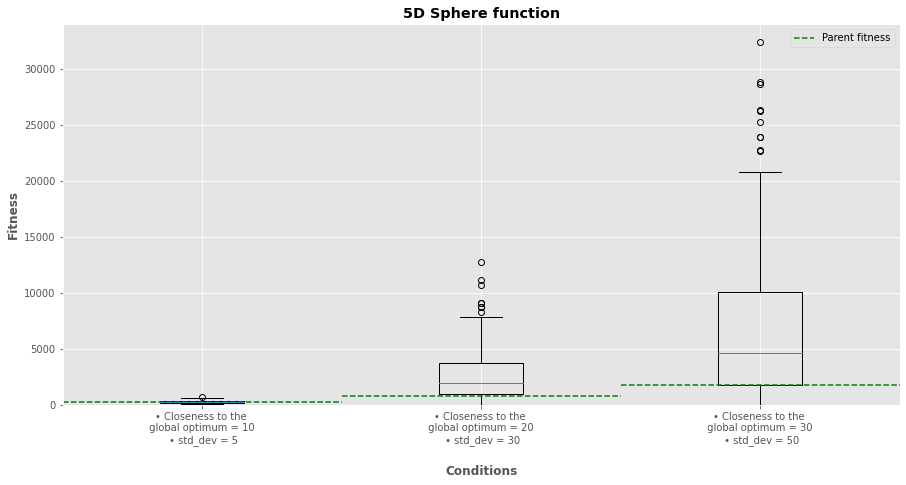

In [26]:
from utils.utils_01.ga import generate_offspring
from pylab import *
from random import Random
import sys

""" 
-------------------------------------------------------------------------
Edit this part to do the exercises

Try different values for either:
    (1) the number of dimensions of the search space
    (2) how close the parent is to the global optimum
    (3) the mutation rate
 If you vary one of the three things, you may want to keep the other two
 at a constant value to better understand the effects (as shown in the
 example below).
"""

# (1) Vary the number of dimensions of the search space
num_vars_1 = 2;
num_vars_2 = 2;
num_vars_3 = 2;

# (2) Vary how close the parent is to the optimum
value_1 = 10;
value_2 = 20;
value_3 = 30;

# The parents are created for the three conditions
x0_1 = value_1*ones(num_vars_1);
x0_2 = value_2*ones(num_vars_2);
x0_3 = value_3*ones(num_vars_3);

# (3) Vary the standard deviation of the Gaussian mutations
std_dev_1 = 5;
std_dev_2 = 30;
std_dev_3 = 50;

# Number of offspring to be generated
num_offspring = 200;

"""
-------------------------------------------------------------------------
"""

args = {}
seed = None
rng = Random(seed)
# Generate offspring for the three conditions
args["fig_title"] = 'Random sampling (condition 1)'
parent_fitness_1, offspring_fitness_1, _ = generate_offspring(rng, x0_1, 
                                                           std_dev_1, 
                                                           num_offspring, 
                                                           False, args);
args["fig_title"] = 'Random sampling (condition 2)'
parent_fitness_2, offspring_fitness_2, _ = generate_offspring(rng, x0_2, 
                                                           std_dev_2, 
                                                           num_offspring, 
                                                           False, args);
args["fig_title"] = 'Random sampling (condition 3)'
parent_fitness_3, offspring_fitness_3, _ = generate_offspring(rng, x0_3,
                                                           std_dev_3, 
                                                           num_offspring, 
                                                           False, args);

"""
Boxplot of the offspring fitnesses. The fitness of the parent is plotted as
a dashed, green line.
"""
fig = figure('Offspring fitness', figsize = (15,7))
ax = fig.gca()
ax.boxplot([offspring_fitness_1, offspring_fitness_2, offspring_fitness_3],
           notch=False)
ax.plot([0.5, 1.5], [parent_fitness_1, parent_fitness_1], 'g--', label='Parent fitness');
ax.plot([1.5, 2.5], [parent_fitness_2, parent_fitness_2], 'g--');
ax.plot([2.5, 3.5], [parent_fitness_3, parent_fitness_3], 'g--');
ax.set_xticklabels(['• Closeness to the \n global optimum = 10 \n • std_dev = 5', '• Closeness to the \n global optimum = 20 \n • std_dev = 30', '• Closeness to the \n global optimum = 30 \n • std_dev = 50'])
ax.set_xlabel(' \nConditions', fontweight =  "bold")
ax.set_ylabel('Fitness', fontweight = "bold")
ax.set_title("5D Sphere function", fontweight ="bold")
ax.set_ylim(ymin=0)
ax.legend()
show()

Increasing the number of dimensions, while maintaining the same distance from the global optimum, requires an increase in the standard deviation in order to reach the global optimum.

# Exercise 3

We will now use an EA to find the minimum of the unimodal fitness function defined in the previous exercise and analyze the effect of the mutation magnitude and the dimensionality of the search space on the results.

Run the next cell to run a basic, mutation-only EA on the 1-D sphere function first.

- **How close is the best individual from the global optimum?** <br>
In the case of the 1D sphere function, the average distance from the global optimum is approximately ≈ 0.0015. This means that the evolutionary algorithm (EA) is capable of reaching the global optimum.


Increase the dimensionality of the search space to two and more.

- **How close are the best individuals now from the global optimum?** <br>
As the dimensionality of the problem increases, the average distance from the global optimum also increases. This is a consequence of the increasing complexity of the problem. In higher-dimensional spaces, there are more possible combinations and variations, making it more challenging to find the global optimum. The increased dimensionality adds to the search space's vastness, making it more difficult to navigate and locate the optimal solution.
- **Can you get as close as in the one-dimensional case by modifying the mutation magnitude and/or the number of generations?**<br>
In general, as the dimensionality increases, it becomes more difficult to achieve levels of proximity similar to those obtained in the 1D case. This observation suggests that in higher dimensions, evolutionary algorithms (EAs) may not be the optimal solution. The increased dimensionality poses challenges such as the curse of dimensionality, where the search space grows exponentially, making it harder for EAs to efficiently explore and converge to the global optimum. Alternative optimization methods specifically designed for high-dimensional problems, such as gradient-based methods or metaheuristics tailored for such scenarios, may be more effective in these cases.


# 1D

Distance from Global Optimum 0.001590626917116686


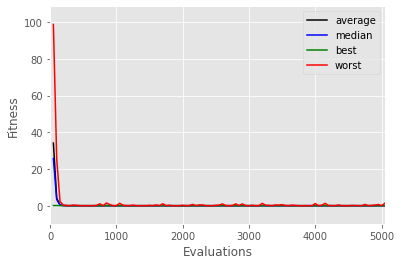

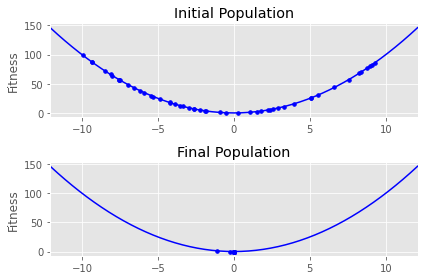

In [28]:
from pylab import *
from random import Random
from utils.utils_01.ga import run_ga
import sys

"""    
-------------------------------------------------------------------------
Edit this part to do the exercises
"""

num_vars = 1 # Number of dimensions of the search space
std_dev = 1 # Standard deviation of the Gaussian mutations

max_generations = 100 # Number of generations of the GA

# parameters for the GA
args = {}
args["crossover_rate"] = 0.3 # Crossover fraction
args["tournament_size"] = 5
args["mutation_rate"] = 0.1 # fraction of loci to perform mutation on
args["num_elites"] = 3 # number of elite individuals to maintain in each gen
args["pop_size"] = 50
args["pop_init_range"] = [-10, 10] # Range for the initial population
display = True # Plot initial and final populations

"""
-------------------------------------------------------------------------
"""

args["fig_title"] = 'GA'

seed = 238842
rng = Random(seed)
# Run the GA
best_individual, best_fitness, final_pop = run_ga(rng, num_vars=num_vars,
                                                  max_generations=max_generations,
                                                  display=display,
                                                  gaussian_stdev=std_dev,**args)


#print("Final Pop",final_pop, "\n\n\n")

# Display the results
#print("Best Individual:", best_individual)
#print("Best Fitness:", best_fitness)
# The distance from the optimum in the N-dimensional space
print("Distance from Global Optimum", sqrt(sum(array(best_individual) ** 2)))
if display :
    ioff()
    show()

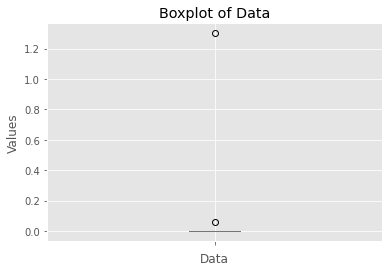

In [83]:
fitness_values = []
for individual in final_pop:
    fitness_values.append(individual.fitness)
    
# Create a figure and axes
fig, ax = plt.subplots()

# Plot the boxplot
ax.boxplot(fitness_values)

# Set labels and title
ax.set_ylabel('Values')
ax.set_title('Fitness values of final pop')
ax.set_xticklabels([])

# Show the plot
plt.show()

## 2D

Distance from Global Optimum 0.005253816636394125


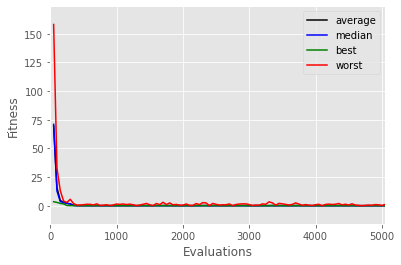

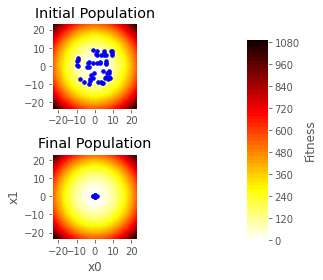

In [87]:
"""    
-------------------------------------------------------------------------
Edit this part to do the exercises
"""

num_vars = 2 # Number of dimensions of the search space
std_dev = 1 # Standard deviation of the Gaussian mutations

max_generations = 100 # Number of generations of the GA

# parameters for the GA
args = {}
args["crossover_rate"] = 0.3 # Crossover fraction
args["tournament_size"] = 5
args["mutation_rate"] = 0.1 # fraction of loci to perform mutation on
args["num_elites"] = 3 # number of elite individuals to maintain in each gen
args["pop_size"] = 50
args["pop_init_range"] = [-10, 10] # Range for the initial population
display = True # Plot initial and final populations

"""
-------------------------------------------------------------------------
"""

args["fig_title"] = 'GA'

seed = 238842
rng = Random(seed)
# Run the GA
best_individual, best_fitness, final_pop = run_ga(rng, num_vars=num_vars,
                                                  max_generations=max_generations,
                                                  display=display,
                                                  gaussian_stdev=std_dev,**args)





# Display the results
# The distance from the optimum in the N-dimensional space
print("Distance from Global Optimum", sqrt(sum(array(best_individual) ** 2)))
if display :
    ioff()
    show()

## 3D

In [ ]:
fitness_values = []
for individual in final_pop:
    fitness_values.append(individual.fitness)
    
# Create a figure and axes
fig, ax = plt.subplots()

# Plot the boxplot
ax.boxplot(fitness_values)

# Set labels and title
ax.set_ylabel('Values')
ax.set_title('Fitness values of final pop')
ax.set_xticklabels([])

# Show the plot
plt.show()

Distance from Global Optimum 0.0072010037228611296


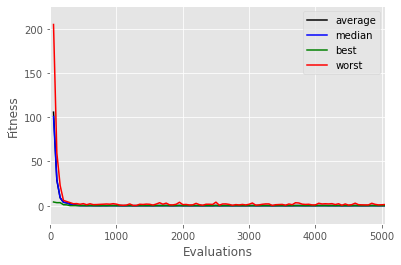

In [117]:
"""    
-------------------------------------------------------------------------
Edit this part to do the exercises
"""

num_vars = 3 # Number of dimensions of the search space
std_dev = 1 # Standard deviation of the Gaussian mutations

max_generations = 100 # Number of generations of the GA

# parameters for the GA
args = {}
args["crossover_rate"] = 0.3 # Crossover fraction
args["tournament_size"] = 5
args["mutation_rate"] = 0.1 # fraction of loci to perform mutation on
args["num_elites"] = 3 # number of elite individuals to maintain in each gen
args["pop_size"] = 50
args["pop_init_range"] = [-10, 10] # Range for the initial population
display = True # Plot initial and final populations

"""
-------------------------------------------------------------------------
"""

args["fig_title"] = 'GA'

seed = 238842
rng = Random(seed)
# Run the GA
best_individual, best_fitness, final_pop = run_ga(rng, num_vars=num_vars,
                                                  max_generations=max_generations,
                                                  display=display,
                                                  gaussian_stdev=std_dev,**args)





# Display the results
# The distance from the optimum in the N-dimensional space
print("Distance from Global Optimum", sqrt(sum(array(best_individual) ** 2)))
if display :
    ioff()
    show()

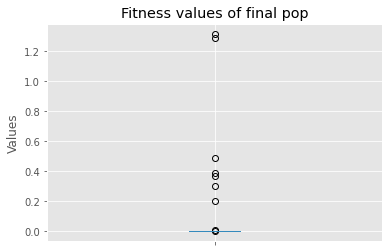

In [118]:
fitness_values = []
for individual in final_pop:
    fitness_values.append(individual.fitness)
    
# Create a figure and axes
fig, ax = plt.subplots()

# Plot the boxplot
ax.boxplot(fitness_values)

# Set labels and title
ax.set_ylabel('Values')
ax.set_title('Fitness values of final pop')
ax.set_xticklabels([])

# Show the plot
plt.show()

## Increasing the number of dimension

In [29]:
num_vars = [1,2,3,4,5,6,7,8,9,10] # Number of dimensions of the search space
std_dev = 10 # Standard deviation of the Gaussian mutations
max_generations = 100 # Number of generations of the GA

distances = []

# parameters for the GA
args = {}
args["crossover_rate"] = 0.3 # Crossover fraction
args["tournament_size"] = 5
args["mutation_rate"] = 0.1 # fraction of loci to perform mutation on
args["num_elites"] = 3 # number of elite individuals to maintain in each gen
args["pop_size"] = 50
args["pop_init_range"] = [-10, 10] # Range for the initial population


seed = 238842
rng = Random(seed)

for i in num_vars:
# Run the GA
    best_individual, best_fitness, final_pop = run_ga(rng, num_vars=i,
                                                      max_generations=max_generations,
                                                      display=False,
                                                      gaussian_stdev=std_dev,**args)
    distance = sqrt(sum(array(best_individual) ** 2))
    distances.append(distance)

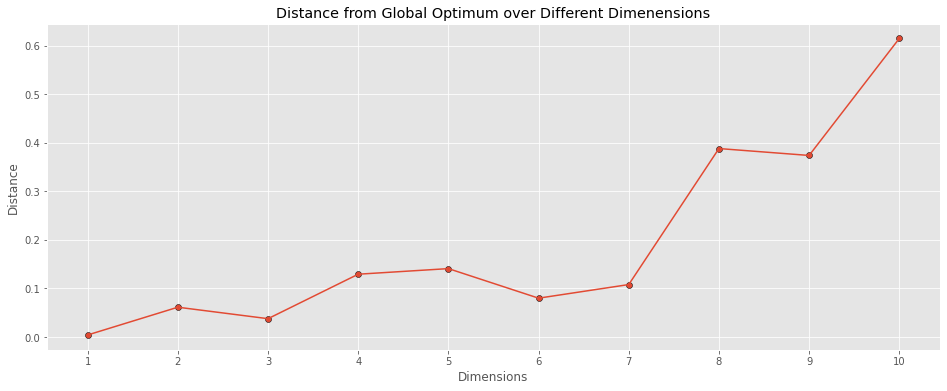

In [30]:
fig, ax = plt.subplots(figsize=(16,6))
ax.scatter(num_vars, distances, edgecolor = "black")
ax.plot(num_vars, distances)
ax.set_xticks(num_vars)
ax.set_xlabel("Dimensions")
ax.set_title("Distance from Global Optimum over Different Dimenensions")
ax.set_ylabel("Distance")
plt.show()

In [31]:
num_vars = [1,20,50,100,200,500,750,1000] # Number of dimensions of the search space
std_dev = 10 # Standard deviation of the Gaussian mutations
max_generations = 100 # Number of generations of the GA

distances = []

# parameters for the GA
args = {}
args["crossover_rate"] = 0.3 # Crossover fraction
args["tournament_size"] = 5
args["mutation_rate"] = 0.1 # fraction of loci to perform mutation on
args["num_elites"] = 3 # number of elite individuals to maintain in each gen
args["pop_size"] = 50
args["pop_init_range"] = [-10, 10] # Range for the initial population


seed = 238842
rng = Random(seed)

for i in num_vars:
# Run the GA
    best_individual, best_fitness, final_pop = run_ga(rng, num_vars=i,
                                                      max_generations=max_generations,
                                                      display=False,
                                                      gaussian_stdev=std_dev,**args)
    distance = sqrt(sum(array(best_individual) ** 2))
    distances.append(distance)

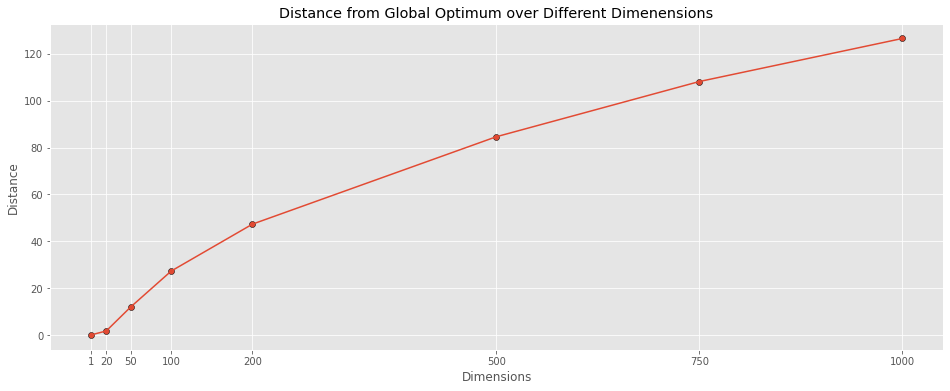

In [32]:
fig, ax = plt.subplots(figsize=(16,6))
ax.scatter(num_vars, distances, edgecolor = "black")
ax.plot(num_vars, distances)
ax.set_xticks(num_vars)
ax.set_xlabel("Dimensions")
ax.set_title("Distance from Global Optimum over Different Dimenensions")
ax.set_ylabel("Distance")
plt.show()

# Exercise 4
In this exercise we will try to confirm the observations that we did qualitatively in the previous exercise, by plotting boxplots side-by-side to evaluate the statistical significance of observed differences.

Run the next cell to do three batches of $30$ runs of the EA with different mutation magnitudes (it may take a minute). The boxplot compares the best fitness values obtained (at the end of each run) in the three conditions.

- **Did you see any difference in the best fitness obtained? Try to explain the result.** <br>
Increasing the standard deviation does lead to a sparser population, but in the 1D case, even for high values of the standard deviation, the performance remains satisfactory. This can be attributed to the relatively simple nature of 1D problems, where the search space is limited and the optimum can be easily reached regardless of the sparsity of the population. However, it's important to note that in higher-dimensional problems, increasing the standard deviation alone may not be sufficient to ensure effective exploration of the search space, and more sophisticated strategies may be required to strike a balance between exploration and exploitation.  <br>
Indeed, the mutation rate also has similar effects on the population dynamics, but its impact is generally less pronounced compared to varying the standard deviation. The mutation rate determines the probability of each gene or parameter being mutated in each generation. A higher mutation rate increases the likelihood of introducing new genetic material into the population and exploring different regions of the search space.
In the case of 1D problems, where the search space is simpler, the effect of the mutation rate may not be as prominent as in higher-dimensional problems. The population may still exhibit satisfactory performance even with relatively low mutation rates. However, in more complex and higher-dimensional problems, the mutation rate becomes crucial in striking the right balance between exploration and exploitation. Too low of a mutation rate may lead to premature convergence, trapping the population in suboptimal regions, while too high of a mutation rate may hinder convergence and prevent the population from reaching the global optimum.

Overall, both the mutation rate and standard deviation play important roles in shaping the exploration-exploitation trade-off in evolutionary algorithms, with the standard deviation often having a more noticeable impact on performance, particularly in higher-dimensional problems.


### varying std_dev

In [122]:
"""    
-------------------------------------------------------------------------
Edit this part to do the exercises
"""

num_vars = 2 # Number of dimensions of the search space
std_devs = [0.01, 0.05, 0.1, 0.2, 0.5, 0.7, 1, 2, 5, 7, 10, 20] # Standard deviation of the Gaussian mutations
max_generations = 50 # Number of generations of the GA
num_runs = 30 # Number of runs to be done for each stdev

# parameters for the GA
args = {}
args["crossover_rate"] = 0.3 # Crossover fraction
args["tournament_size"] = 5
args["mutation_rate"] = 0.1 # fraction of loci to perform mutation on
args["num_elites"] = 3 # number of elite individuals to maintain in each gen
args["pop_size"] = 50 # population size
args["pop_init_range"] = [-10, 10] # Range for the initial population
display = None # Plot initial and final populations

"""
-------------------------------------------------------------------------
"""

args["fig_title"] = 'GA'

seed = 238842
rng = Random(seed)
# run the GA *num_runs* times for each std_dev and record the best fits
best_fitnesses = [[run_ga(rng, num_vars=num_vars, 
                          max_generations=max_generations, display=display,
                          gaussian_stdev=std_dev,**args)[1] 
                    for _ in range(num_runs)]
                    for std_dev in std_devs]

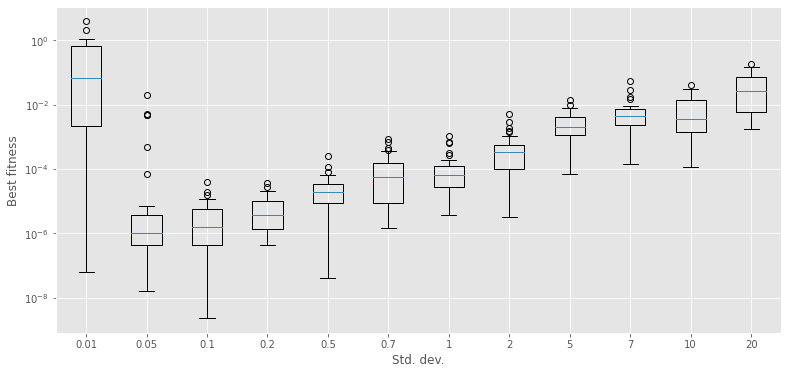

In [123]:
fig = figure('GA (best fitness)', figsize = (13,6))
ax = fig.gca()
ax.boxplot(best_fitnesses)
ax.set_xticklabels(std_devs)
ax.set_yscale('log')
ax.set_xlabel('Std. dev.')
ax.set_ylabel('Best fitness')
ax.set_title("Best fitness for every run (30) over different ")
show()

### varying mutation rate (std_dev = 0.05)

In [125]:
"""
-------------------------------------------------------------------------
Edit this part to do the exercises
"""

num_vars = 2  # Number of dimensions of the search space
std_dev = 0.05  # Standard deviation of the Gaussian mutations
max_generations = 50  # Number of generations of the GA
num_runs = 30  # Number of runs to be done for each stdev

# parameters for the GA
args = {}
args["crossover_rate"] = 0.3  # Crossover fraction
args["tournament_size"] = 5
mutation_rates = [0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]  # List of mutation rates to try
args["num_elites"] = 3  # number of elite individuals to maintain in each gen
args["pop_size"] = 50  # population size
args["pop_init_range"] = [-10, 10]  # Range for the initial population
display = None  # Plot initial and final populations

"""
-------------------------------------------------------------------------
"""

args["fig_title"] = f'GA (std_dev={std_dev})'

seed = 238842
rng = Random(seed)

# Run the GA *num_runs* times for each mutation rate and record the best fits
best_fitnesses = [[run_ga(rng, num_vars=num_vars,
                          max_generations=max_generations, display=display,
                          gaussian_stdev=std_dev, mutation_rate=mutation_rate, **args)[1]
                   for _ in range(num_runs)]
                  for mutation_rate in mutation_rates]


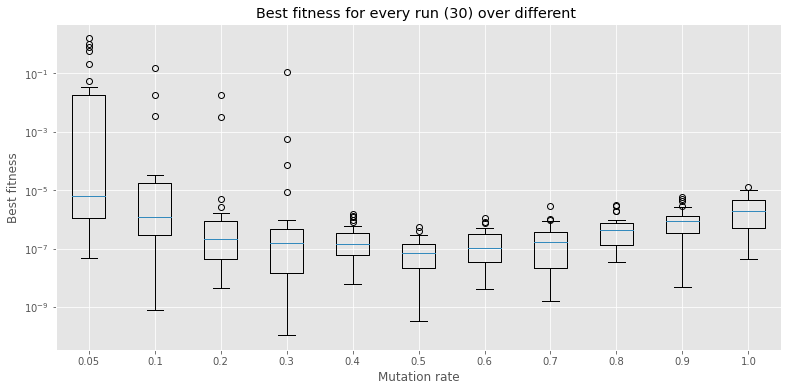

In [127]:
fig = figure('GA (best fitness)', figsize = (13,6))
ax = fig.gca()
ax.boxplot(best_fitnesses)
ax.set_xticklabels(mutation_rates)
ax.set_yscale('log')
ax.set_xlabel('Mutation rate')
ax.set_ylabel('Best fitness')
ax.set_title("Best fitness for every run (30) over different ")
show()